# En este cuaderno de Jupyter, realizaremos un análisis exploratorio para la data referida al proyecto "análisis para rutas turisticas de la provincia del Sumapaz"

Como primera medida importaremos las librerías que necesitamos para este fin, las cuales son Pandas, Matplotlib y numpy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Una vez hemos importado nuestras librerias procederemos con la carga de la data a analizar

In [3]:
Data_completa = pd.read_csv(r"DatosTableau.csv", error_bad_lines=False, encoding='latin-1')

b'Skipping line 4: expected 24 fields, saw 25\nSkipping line 12: expected 24 fields, saw 25\n'


Una vez hemos realizado el cargue de la información imprimiremos nuesto data frame principal

In [4]:
Data_completa

,ID_ESTABLECIMIENTO,nombre,latitud,longitud,estado,Municipio_Establecimiento,Tipo_Establecimeinto,Nombre_POI,Latitud_POI,Longitud_POI,...,ID_RUTA,Nombre_Ruta,Costo_Ruta,tiempo_Ruta,Distancia_Ruta_KM,fecha_LOG,Hora_LOG,EVENTO_LOG,POI_NOMBRE_TIPOLOGIA,POI_TIPOLOGIA
0,1.0,El peón,4.340340,-74.358460,1.0,Fusagasugá,Restaurante,Casona del Balmoral,4.334462,-74.36844,...,1.0,prueba,0.0,19.0,16.0,09/06/2021,7:05:56,Modificar,Casona del Balmoral,Arquitectonico
1,2.0,Oh my DOG,4.347568,-74.357796,1.0,Fusagasugá,Restaurante,Casona de la Tulipana,4.337287,-74.36363,...,2.0,Ruta1,0.0,326.0,37.0,09/06/2021,7:08:29,Modificar,Casona del Balmoral,Museos
2,4.0,Hotel central Fusa,4.343569,-74.362898,1.0,Fusagasugá,Hotel,Petroglifos,4.249299,-74.37399,...,4.0,ruta3,0.0,38.0,2.0,09/06/2021,7:51:12,Crear,Casona de la Tulipana,Arquitectonico
3,5.0,Hotel Santa Monica,4.342588,-74.363036,1.0,Fusagasugá,Hotel,Hacienda cafetera Coloma,4.343065,-74.37728,...,5.0,ruta6,0.0,32.0,2.0,09/06/2021,7:51:28,Modificar,Casona de la Tulipana,Historico y artistico
4,7.0,Terpel,4.347962,-74.361039,1.0,Fusagasugá,Gasolinera,Parroquia nuestra senora de belen,4.344037,-74.36163,...,7.0,ruta7,0.0,579.0,153.0,09/06/2021,7:51:38,Modificar,Casona de Coburgo,Arquitectonico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casona las bromelias,Historico y artistico
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quebrada la lejia,Sitios Naturales
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerro Pan de Azucar,Sitios Naturales
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mesa del medio,Sitios Naturales


Para el correcto manejo de la infromación, crearemos data frames separados a partir de la data completa, con el proposito de manipular la data con base en los enfoques que son necesarios para el analisis. Comenzaremos con la creación del data frame de Establecimientos, para esto deberemos seccionar las columnas que queremos en variables y luego unirlas en un nuevo data frame

## DataFrame Establecimientos

In [5]:
ID_Establecimiento = Data_completa['ID_ESTABLECIMIENTO']
Nombre_Establecimiento = Data_completa['nombre']
Latitud_Establecimiento = Data_completa['latitud']
Longitud_Establecimiento = Data_completa['longitud']
Estado_Establecimiento = Data_completa['estado']
Municipio_Establecimiento = Data_completa['Municipio_Establecimiento']
Tipo_Establecimiento = Data_completa['Tipo_Establecimeinto']

Una vez hemos seccionado nuestra data, la agregaremos al nuevo data frame exclusivo para los establecimientos comerciales, para esto primero crearemos un dataframe vacío, y luego añadiremos sus columnas de forma individual

In [6]:
Data_Establecimientos = pd.DataFrame()

In [7]:
Data_Establecimientos['ID'] = ID_Establecimiento
Data_Establecimientos['Nombre'] = Nombre_Establecimiento
Data_Establecimientos['Latitud'] = Latitud_Establecimiento
Data_Establecimientos['Longitud'] = Longitud_Establecimiento
Data_Establecimientos['Estado'] = Estado_Establecimiento
Data_Establecimientos['Municipio'] = Municipio_Establecimiento
Data_Establecimientos['Tipo'] = Tipo_Establecimiento

Una vez hemos seccionado nuestra data, imprimiremos el data frame resultante, eliminando sus filas vacías para agilizar el proceso de análisis y la organización del segmento de datos

In [8]:
Data_Establecimientos.dropna()

,ID,Nombre,Latitud,Longitud,Estado,Municipio,Tipo
0,1.0,El peón,4.340340,-74.358460,1.0,Fusagasugá,Restaurante
1,2.0,Oh my DOG,4.347568,-74.357796,1.0,Fusagasugá,Restaurante
2,4.0,Hotel central Fusa,4.343569,-74.362898,1.0,Fusagasugá,Hotel
3,5.0,Hotel Santa Monica,4.342588,-74.363036,1.0,Fusagasugá,Hotel
4,7.0,Terpel,4.347962,-74.361039,1.0,Fusagasugá,Gasolinera
5,8.0,Hospital San Rafael,4.333441,-74.371329,1.0,Fusagasugá,Hospital
6,9.0,Clinica Belen,4.336193,-74.366158,1.0,Fusagasugá,Hospital


Una vez que tenemos nuestro volumen de datos listo para operar, podemos decribir los datos de varias maneras, como por ejemplo determinar que tipo de dato estamos usando.

In [11]:
Data_Establecimientos['Tipo'].dtype

dtype('O')

Como podemos apreciar, el tipo de dato que manejamos son cadenas de texto, y podemos contar sus frecuencias con la función value_counts(), para luego gráficar con la función plot(), especificando el tipo de gráfico que queremos como resultado.

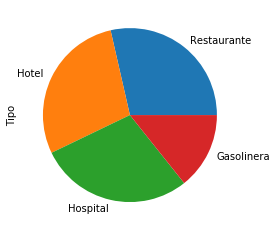

In [12]:
Data_Establecimientos['Tipo'].value_counts().plot(kind = "pie")

Como podemos ver en el gráfico anterior, el tipo dominante de establecimiento comercial que existe en el municipio de Fusagasugá (recordando que estos datos presentan un sesgo grande en función de los demás municipios) es el restaurante, seguido de los hoteles y los hospitales. Esto nos da un punto de referencia, dado que en el municipio, el atractivo turísitco se ve fuertemente influenciado por la gastronomía, tanto local como fusión, lo cual lo hace un destino atractivo a los viajeros y exploradores del paladar, aumentando el ingreso turístico del municipio.

Ahora, haremos uso de los datos geográficos, para esto haremos uso de la función plot(), pero al realizar el proceso notamos que no es posible insertar los limites del mapa deseado sin usar otro tipo de librerías, para lo cual estos datos dentro del análisis exploratorio no será muy relevante, con esto claro, los datos geográficos serán aprovechados a través de la herramienta BI seleccionada, así como en otras dependencias de Python.

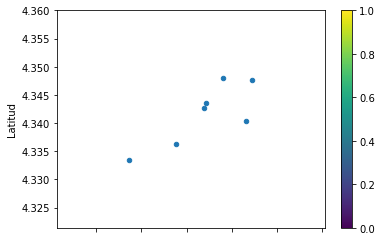

In [13]:
Data_Establecimientos.plot(x="Longitud", y="Latitud", kind = "scatter", colormap="YlOrRd")

Sin embargo, podemos apreciar que los puntos geográficos presentan una distribución amplia en torno de la geografía del municipio, siendo separados por grandes distancias, y compartiendo ubicaciones similares en casos muy puntuales, lo que puede llevar a la creación de una ruta gastronomica dentro del municipio, teniendo claridad de las distancias, es factible proponer su recorrido en vehículos motorizados o en bicicletas.

## DataFrame POI (Puntos de interés)

Para este apartado, será necesario repetir el proceso realizado con la data completa anteriormente, en el cual seccionaremos la información en nuevo DataFrame, con el fin de manejarla de una manera más efectiva. Como primera medida, seccionaremos las columnas a utilzar y las almacenaremos en nuevas variables para su anexión al nuevo DataFrame.

In [14]:
Nombre_POI = Data_completa['Nombre_POI']
Latitud_POI = Data_completa['Latitud_POI']
Longitud_POI = Data_completa['Longitud_POI']
Costo_POI = Data_completa['Costo_POI']
TiempoEstancia_POI = Data_completa['tiempoEstancia_POI']
Descripcion_POI = Data_completa['descripcion_POI']
Municipio_POI = Data_completa['Municipio_POI']

Una vez hemos seccionado la data, procederemos a realizar la creación y anexión de las columnas al DataFrame

In [15]:
Data_POI = pd.DataFrame()

In [16]:
Data_POI['Nombre'] = Nombre_POI
Data_POI['Latitud'] = Latitud_POI
Data_POI['Longitud'] = Longitud_POI
Data_POI['Costo'] = Costo_POI
Data_POI['Tiempo_Estancia'] = TiempoEstancia_POI
Data_POI['Descripción'] = Descripcion_POI
Data_POI['Municipio'] = Municipio_POI

In [18]:
Data_POI.dropna()

,Nombre,Latitud,Longitud,Costo,Tiempo_Estancia,Descripción,Municipio
0,Casona del Balmoral,4.334462,-74.36844,0.0,30.0,Poi,Fusagasugá
1,Casona de la Tulipana,4.337287,-74.36363,0.0,15.0,Poi,Fusagasugá
2,Petroglifos,4.249299,-74.37399,0.0,60.0,Poi,Arbelaéz
3,Hacienda cafetera Coloma,4.343065,-74.37728,0.0,120.0,Poi,Fusagasugá
4,Parroquia nuestra senora de belen,4.344037,-74.36163,0.0,20.0,Poi,Fusagasugá
5,Parroquia nuestra senora de la encarnacion,4.308809,-74.29989,0.0,20.0,Poi,Pasca
6,Parroquia inmaculada concepciÃ³n,4.272110,-74.41452,0.0,20.0,Poi,Arbelaéz
7,Parroquia santa lucia,4.348481,-74.45319,0.0,20.0,Poi,Tibacuy
8,Cerro del Quinini,4.329009,-74.49752,0.0,240.0,Poi,Tibacuy
9,Ecoparque Chinauta,4.285173,-74.47211,0.0,45.0,Poi,Fusagasugá


Una vez hemos generado nuestro DataFrame, generaremos un análisis en torno de las variables aplicables a este contexto, con lo cual podremos definir de mejor manera la construcción de gráficas, así como mostrar que tipo de dato se maneja.

In [19]:
Data_POI['Descripción'].dtype

dtype('O')

Como se puede apreciar, al manejar la descripción de lso datos se establece que su tipo es objeto, que hablando en términos de Pandas, serán una cadena de texto, con esto podremos medir la frecuencia de aparición y determinar que descripción es más común, teniendo en cuenta que la tipología de los mismos será explorada en otro DataFrame exclusivo a este tema.

In [20]:
Data_POI['Descripción'].value_counts()

Poi                                                                  38
Sitio natural con mirador y piedras con petroglificos y glamping.     1
Name: Descripción, dtype: int64

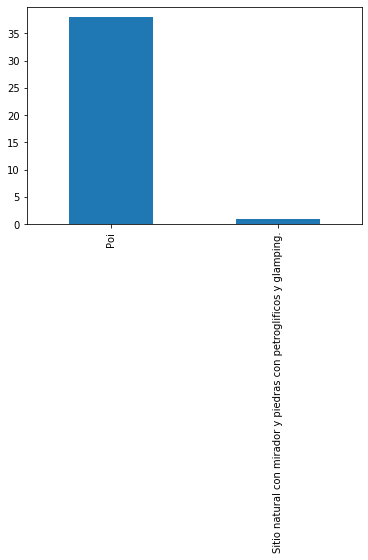

In [21]:
Data_POI['Descripción'].value_counts().plot(kind = 'bar')

Como se puede notar en la gráfica, obtenemos que la descripción general más utilizada dentro del marco de la descripción de puntos de interés se situa en POI, el cual es un acronimo para Point of interest, el cual no dice mucho por sí solo, pero hace notar que estos puntos clave se centran en el interés turístico de los visitantes, lo cual incremente el atractivo de los turistas hacia un municipio en concreto.
Una vez hemos definido esto, podremos entrar a ver que municipio presenta el mayor potencial de visita con base en la cantidad de POI's que posee, para esto realizaremos un gráfico de sectores circular que evidenciará una respuesta a este planteamineto.

In [22]:
Data_POI['Municipio'].value_counts()

Fusagasugá    21
Arbelaéz       6
Silvania       5
Tibacuy        5
Pasca          2
Name: Municipio, dtype: int64

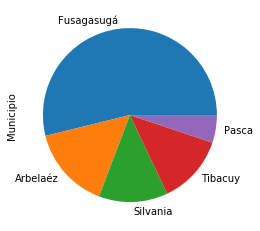

In [23]:
Data_POI['Municipio'].value_counts().plot(kind = 'pie')

Con base en el gráfico y en el conteo realizado, podemos definir que el municipio de Fusagasugá cuanta con el mayor potencial de atractivo turístico en función de sus puntos de interés, ya que posee un total de 21 puntos concretos, seguido del munciipo de arbelaez, el cual muestra una tendencia hacia el desarrollo turístico en función de sus 6 puntos concretos. PAra el caso de Tibacuy, Silvania y Pasca, se propende por la mantención de puntos ya establecidos, enfocando su camino hacia la apertura gradual de nuevos POI's para incrementar su potencial de visita.
Una ve hemos determinado que municipio tiene mayor potencial turístico, es posible definir cual es el tiempo promedio que gastan los turistas en apreciar y visitar cada uno de los POI, para esto utilizaremos la función mean() para promediar la columna de tiempos

In [24]:
Data_POI['Tiempo_Estancia'].dropna()

0      30.0
1      15.0
2      60.0
3     120.0
4      20.0
5      20.0
6      20.0
7      20.0
8     240.0
9      45.0
10     60.0
11     15.0
12     15.0
13     40.0
14     60.0
15     30.0
16     15.0
17     20.0
18     40.0
19     40.0
20     15.0
21     15.0
22     20.0
23     10.0
24     30.0
25     20.0
26     15.0
27    180.0
28    150.0
29     30.0
30    100.0
31     40.0
32     20.0
33     40.0
34     60.0
35     60.0
36     60.0
37    150.0
38     60.0
Name: Tiempo_Estancia, dtype: float64

Ahora deberemos convertir el tipo de la columna a entero para realizar operaciones estadísticas, esto lo haremos con la función astype() donde indicaremos el tipo de dato atratar, con esto obtendremos: Tiempo promoedio, tiempo minimo y tiempo máximo.

In [25]:
Tiempo_estancia = Data_POI['Tiempo_Estancia'].dropna().astype(int)

Ahora determinaremos el tiempo promedio de estancia del turista en los POI

In [26]:
Tiempo_estancia.mean()

51.282051282051285

In [27]:
Tiempo_estancia.std()

51.43618873391559

Ahora, encontraremos el valor máximo de la columna de tiempo

In [28]:
Tiempo_estancia.max()

240

Y su valor minímo

In [29]:
Tiempo_estancia.min()

10

In [30]:
Data_POI.dropna()

,Nombre,Latitud,Longitud,Costo,Tiempo_Estancia,Descripción,Municipio
0,Casona del Balmoral,4.334462,-74.36844,0.0,30.0,Poi,Fusagasugá
1,Casona de la Tulipana,4.337287,-74.36363,0.0,15.0,Poi,Fusagasugá
2,Petroglifos,4.249299,-74.37399,0.0,60.0,Poi,Arbelaéz
3,Hacienda cafetera Coloma,4.343065,-74.37728,0.0,120.0,Poi,Fusagasugá
4,Parroquia nuestra senora de belen,4.344037,-74.36163,0.0,20.0,Poi,Fusagasugá
5,Parroquia nuestra senora de la encarnacion,4.308809,-74.29989,0.0,20.0,Poi,Pasca
6,Parroquia inmaculada concepciÃ³n,4.272110,-74.41452,0.0,20.0,Poi,Arbelaéz
7,Parroquia santa lucia,4.348481,-74.45319,0.0,20.0,Poi,Tibacuy
8,Cerro del Quinini,4.329009,-74.49752,0.0,240.0,Poi,Tibacuy
9,Ecoparque Chinauta,4.285173,-74.47211,0.0,45.0,Poi,Fusagasugá


Ahora convertiremos el tipo de la columna costos (la cual esta en forma de cadena de texto) a tipo entero para determinar su promedio y su desviación estandar

In [31]:
Costo = Data_POI['Costo'].dropna().astype(int) #elimina los datos nulos y pasa los datos a entero

In [32]:
Costo.mean()

128.2051282051282

In [33]:
Costo.std()

800.6407690254357

## DataFrame Rutas

Para esta sección contemplamos la creación de un nuevo DataFrame con el contenido de la data bruta.

En esta sección realizaremos el proceso anteriormente descrito a la información referente a la tabla rutas, para lo cual definiremos en primera instancia las colecciones de datos asignados a las columnas de nuestro DataFrame.

In [34]:
ID_Ruta = Data_completa['ID_RUTA']
Nombre = Data_completa['Nombre_Ruta']
Costo = Data_completa['Costo_Ruta']
Tiempo = Data_completa['tiempo_Ruta']
Distancia = Data_completa['Distancia_Ruta_KM']

Una vez hemos seccionado nuestra data, procedemos con la creación de la estructura del DataFrame, y con la asignación y anexión de columnas al mismo

In [35]:
Data_Rutas = pd.DataFrame()

In [36]:
Data_Rutas['ID'] = ID_Ruta
Data_Rutas['Nombre'] = Nombre
Data_Rutas['Costo'] = Costo
Data_Rutas['Tiempo'] = Tiempo
Data_Rutas['Distancia'] = Distancia

In [37]:
Data_Rutas.dropna()

,ID,Nombre,Costo,Tiempo,Distancia
0,1.0,prueba,0.0,19.0,16.0
1,2.0,Ruta1,0.0,326.0,37.0
2,4.0,ruta3,0.0,38.0,2.0
3,5.0,ruta6,0.0,32.0,2.0
4,7.0,ruta7,0.0,579.0,153.0
5,8.0,ttth,5000.0,317.0,23.0
6,9.0,miruta,0.0,41.0,4.0
7,10.0,jkkk,0.0,426.0,128.0
8,11.0,Mi ruta nueva,0.0,349.0,115.0
9,13.0,Ruta prueba,0.0,78.0,2.0


Como se puede apreciar, dentro de la data referente a rutas turisticas los datos se prestan para realizar operaciones de media, con el fin de ver en promedio cuanto tiempo, dinero y distancia invierten los visitantes en su ejercicio turistico.

In [38]:
Promedio_Tiempo_rutas = Data_Rutas['Tiempo'].dropna().astype(int)

In [39]:
Promedio_Tiempo_rutas.mean()

256.6666666666667

In [40]:
Promedio_Tiempo_rutas.std()

176.50165249462492

In [41]:
Promedio_Costo_rutas = Data_Rutas['Costo'].dropna().astype(int)
Promedio_Costo_rutas.mean()

238.0952380952381

In [42]:
Promedio_Costo_rutas.std()

1091.0894511799618

In [43]:
Promedio_Distancia_rutas = Data_Rutas['Distancia'].dropna().astype(int)
Promedio_Distancia_rutas.mean()

40.142857142857146

In [44]:
Promedio_Distancia_rutas.std()

44.57834195468211

## DataFrame LOG (uso del aplicativo)

Como primera medida, seccionaremos la data y construiremos el DataFrame que la contendrá.

In [45]:
Fecha_LOG = Data_completa['fecha_LOG']
Hora_LOG = Data_completa['Hora_LOG']
Evento_LOG = Data_completa['EVENTO_LOG']

In [46]:
Data_LOG = pd.DataFrame()

Ahora, procederemos con la anexión e ingreso de información al DataFrame

In [47]:
Data_LOG['Fecha'] = Fecha_LOG
Data_LOG['Hora'] = Hora_LOG
Data_LOG['Evento'] = Evento_LOG

In [48]:
Data_LOG.dropna()

,Fecha,Hora,Evento
0,09/06/2021,7:05:56,Modificar
1,09/06/2021,7:08:29,Modificar
2,09/06/2021,7:51:12,Crear
3,09/06/2021,7:51:28,Modificar
4,09/06/2021,7:51:38,Modificar
5,09/06/2021,7:52:28,Crear
6,09/06/2021,7:52:38,Modificar
7,09/06/2021,7:54:03,Modificar
8,09/06/2021,7:58:21,Crear
9,09/06/2021,8:00:05,Crear


In [49]:
Data_LOG['Hora'].dtype

dtype('O')

Como se puede apreciar, nos encontramos con que de las variables consideradas en el DataFrame, podemos encontrar valor en la fecha, determinando en que fecha ha sido más utilizado el aplicativo, marcando una linea de tenednecia dentro de la misma data. De igual manera, podemos encontrar la proporción existente entre los eventos creados para el aplicativo, lo que nos ayudará a comprender de mejor manera el uso del mismo.

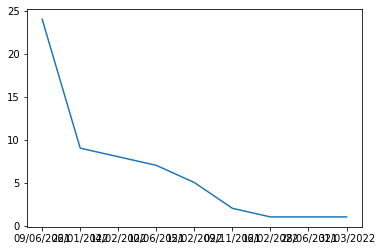

In [50]:
Data_LOG['Fecha'].value_counts().plot(kind = 'line')

Como podemos apreciar en la gráfica, el sistema cuenta con una tendencia en decrecimiento en relación con su uso, lo que nos indica que el aplicativo ha caido en desuso, limitando la vigencia de la data que se ha suministrado y siendo poco aplicable de manera cabal al contexto actual del panorama turístico, esto apoya la idea de retomar la aplicación e integración de la tecnología con la investigación en Turismo.

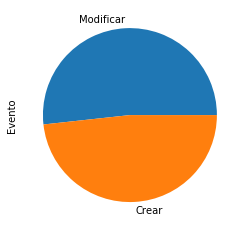

In [51]:
Data_LOG['Evento'].value_counts().plot(kind = 'pie')

En el caso de los eventos registrados dentro de la data, es factible notar una segmentación similar entre los dos tipos de eventos creados, lo que nos indica que el uso del aplicativo ha tenido que ser orientado y corregido casi tanatas veces como se ha ingresado data, lo cual representa una curva de aprendizaje notablemente compleja para cualquier usuario.

## DataFrame Tipología

Como paso final, seccionaremos la data referida a la tipología de los puntos de interés, la cual nos indicará que tipo de atracciones turísticas tienen los terriotorios, lo que a su vez, mostrará sus puntos fuertes en relación con la aceptación del público de su oferta turistica. Para esto, realizaremos el mismo proceso de seccionamiento de data y creación de DataFrame para el almacenaje de la misma.

In [52]:
Nombre_Tipologia = Data_completa['POI_NOMBRE_TIPOLOGIA']
Tipologia_POI = Data_completa['POI_TIPOLOGIA']

In [53]:
Data_Tipologia = pd.DataFrame()

In [54]:
Data_Tipologia['Nombre_POI'] = Nombre_Tipologia
Data_Tipologia['Tipo_POI'] = Tipologia_POI

In [55]:
Data_Tipologia.dropna()

,Nombre_POI,Tipo_POI
0,Casona del Balmoral,Arquitectonico
1,Casona del Balmoral,Museos
2,Casona de la Tulipana,Arquitectonico
3,Casona de la Tulipana,Historico y artistico
4,Casona de Coburgo,Arquitectonico
...,...,...
61,Casona las bromelias,Historico y artistico
62,Quebrada la lejia,Sitios Naturales
63,Cerro Pan de Azucar,Sitios Naturales
64,Mesa del medio,Sitios Naturales


Como se puede apreciar, dentro de la data existen multiples categorías asignadas a un mismo punto de interés, lo cual nos ayudara a determinar a grandes rasgos, que tipo de punto de interés encasilla mayoritariamente a los POI's referidos en los territorios, siendo esta variable (Tipo_POI) la unica aprovechable del presente segmento de datos.

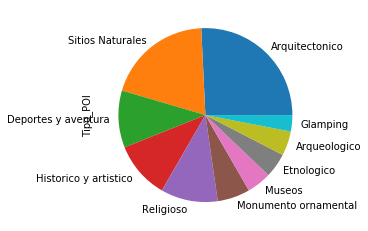

In [56]:
Data_Tipologia['Tipo_POI'].value_counts().plot(kind = 'pie')

Como se puede apreciar, el mayor atractivo turistico que presenta la región del sumapaz es el arquitecntonico, lo cual implica la conservación de sus estructuras y su diseño en torno de su uso a lo largo de la historia de los territorios, seguido de cerca por la belleza natural característica de la región y de sus atractivos ligados como los deportes y aventura, así como el ámbito artistico e historico, el cual muestra una leve presencia, siendo un punto a rescatar. Así mismo los aspectos referidos a la cultura e identidad propia de los municipios se ve relegado a un segundo plano, siendo este un punto a considerar para aumentar el sentido de pertenencia de los habitantes de esta zona.

Con base en estos análisis y al ejercicio de seccionamiento de data, es posible construir un concepto parcial del panorama turístico de la región, teniendo en claro que existe un sesgo muy grande en cuanto a la toma de datos dentro del ejercer del grupo de investigación anterior, lo cual no desmetrita esta labor, pero pone en evidencia el desarrollo progresivo que se necesita para mostrar un avance real en este campo. Dicho concepto será explicado en el docuemnto referido al 4 entregable del presente proyecto.